In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tqdm import tqdm_notebook as tqdm

In [6]:
getname = "strw.leidenuniv.nl/~nobels/coursedata/dataset_LATTE.txt"
fname = "./dataset_LATTE.txt"
if not os.path.isfile(fname):
    os.system(f"wget {getname}")

In [8]:
data = np.loadtxt(fname)

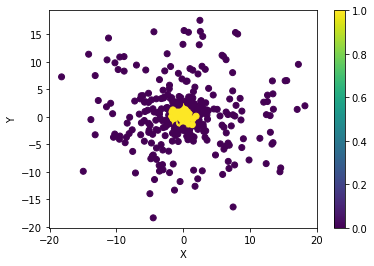

In [11]:
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [15]:
m, n = np.shape(data)
# m is amount of training examples, n is amount of features
print (f"m={m}, n={n}")

m=442, n=3


In [241]:
# matrix of features
X = np.copy(data[:,:2])
# vector of labels
Y = np.copy(data[:,2]).reshape(m,1)
# Apply feature scaling
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)

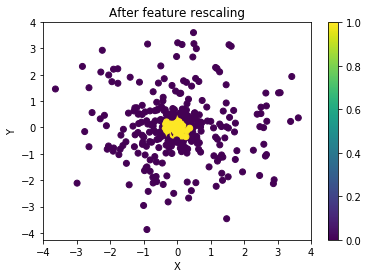

In [165]:
plt.scatter(X[:,0],X[:,1],c=Y.flatten())
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title("After feature rescaling")
plt.show()

## SHOULD START OVER< THIS WENT COMPLETELY WRONG DOWN HERE

In [166]:
def model(a,b,x):
    # Model is a straight line
    # assumes x is a matrix of shape (m,2)
    
    # y hat is the dot product of [a,b] and x
    p = np.array([a,b]).reshape(1,2)
    
    return np.dot(p,x.T) # returns yhat shape (1,m)

def lossfunc(y,yhat):
    # assumes y and yhat are vectors of shape (m,1)
    loss = 1/(2*m) * np.sum((yhat - y.T)**2)
    return loss

def derivative_loss(y,yhat,x):
    derloss1 = 1/m * np.sum( (yhat-y.T)*x[:,0] )
    print (derloss1)
    derloss2 = 1/m * np.sum( (yhat-y.T)*x[:,1] )
    
    derloss = np.array([derloss1,derloss2])
    
    return derloss

In [167]:
def gradient_descent():
    a,b = 0, 0
    yhat = model(a,b,X) 
    J = lossfunc(Y.T, yhat) 
    error = 1e9
    eth = 10 #?
    alpha = 0.01
    all_loss = [J]
    for i in tqdm(range(10)):
        derloss = derivative_loss(Y,yhat,X)
        print (derloss,)
        a -= alpha*derloss[0]
        b -= alpha*derloss[1]
        # calculate new predictions
        yhat = model(a,b,X)
        # save loss
        all_loss.append(lossfunc(Y,yhat))
        
    return a, b, all_loss

In [168]:
a, b, all_loss = gradient_descent()

0.012474463860412167
[0.01247446 0.01463862]
0.012353634615898858
[0.01235363 0.01449557]
0.012233975402316391
[0.01223398 0.01435392]
0.012115474893326435
[0.01211547 0.01421365]
0.011998121872198052
[0.01199812 0.01407476]
0.011881905230747345
[0.01188191 0.01393722]
0.01176681396828741
[0.01176681 0.01380102]
0.011652837190588405
[0.01165284 0.01366616]
0.011539964108847695
[0.01153996 0.01353262]
0.011428184038669952
[0.01142818 0.01340038]



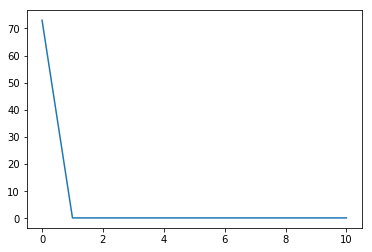

-0.0011944537518129273 -0.0014011392017347331
0.16512769695232202 0.16512461031644302


In [169]:
plt.plot(all_loss)
plt.show()
print (a,b)
print (all_loss[-2],all_loss[-1])

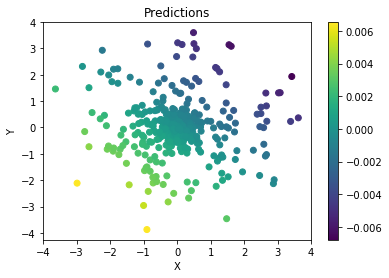

In [163]:
plt.scatter(X[:,0],X[:,1],c=model(a,b,X).flatten())
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title("Predictions")
plt.show()

In [136]:
# Model which is a x1**2 + b x2**2
def model(a,b,x):
    # Model is a straight line
    # assumes x is a matrix of shape (m,3), third column are ones
    
    # y hat is the dot product of [a,b,c] and x
    p = np.array([a,b]).reshape(1,2)
    
    return np.dot(p,(x**2).T) # returns yhat shape (1,m)

def lossfunc(y,yhat):
    # assumes y and yhat are vectors of shape (m,1)
    loss = 1/(2*m) * np.sum(yhat - y.T)**2
    return loss

def derivative_loss(y,yhat,x):
    derloss1 = 1/m * np.sum( (yhat-y.T)*x[:,0]**2 )
    derloss2 = 1/m * np.sum( (yhat-y.T)*x[:,1]**2 )
    
    derloss = np.array([derloss1,derloss2])    
    return derloss

In [137]:
def gradient_descent():
    a,b = 0,0
    Xnew = X
    print (Xnew.shape)
    yhat = model(a,b,Xnew) 
    J = lossfunc(yhat, Y.T) 
    error = 1e9
    eth = 10 #?
    alpha = 0.01
    all_loss = [J]
    for i in tqdm(range(100)):
        derloss = derivative_loss(Y,yhat,Xnew)
        a -= alpha*derloss[0]
        b -= alpha*derloss[1]
        # calculate new predictions
        yhat = model(a,b,Xnew)
        # save loss
        all_loss.append(lossfunc(Y,yhat))
        
    return a, b, c, all_loss

In [138]:
a, b, c, all_loss = gradient_descent()

(442, 2)


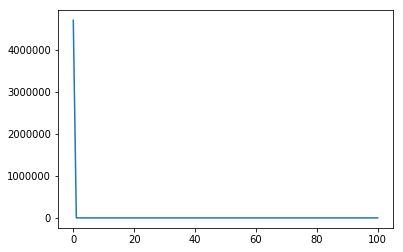

0.0010503216918252723 0.0014933191661747817
23.74319534019483 23.743180500725696


In [139]:
plt.plot(all_loss)
plt.show()
print (a,b)
print (all_loss[-2],all_loss[-1])

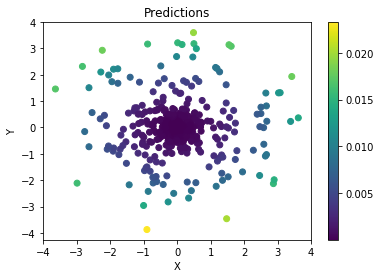

In [140]:
Xnew = X
# add a column of ones at the end
Xnew[:,:2] 
plt.scatter(X[:,0],X[:,1],c=model(a,b,Xnew).flatten())
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title("Predictions")
plt.show()

In [155]:
# Model which is a x1**2 + b x2**2
def newmodel(a,b,x):    
    # y hat is the dot product of [a,b,c] and x
    p = np.array([a,b]).reshape(1,2)
    
    return np.dot(p,(x**2).T) # returns yhat shape (1,m)

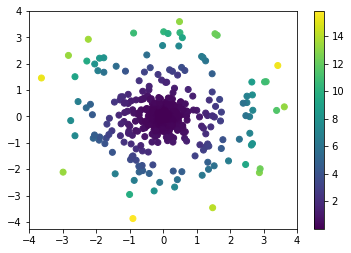

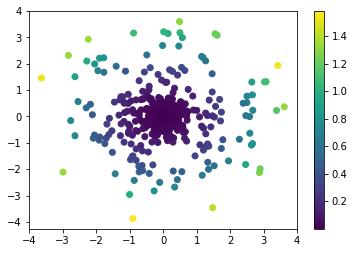

In [156]:
z = newmodel(1,1,X)
plt.scatter(X[:,0],X[:,1],c=z.flatten())
plt.colorbar()
plt.show()

z = newmodel(0.1,0.1,X)
plt.scatter(X[:,0],X[:,1],c=z.flatten())
plt.colorbar()
plt.show()

In [191]:
# Opnieuw
def newmodel(a,x):    
    # 
    return a*(X[:,0]**2+X[:,1]**2).reshape(m,1)

In [225]:
def lossfunc(yhat,y):
    diff = yhat-y
    assert diff.shape == (m,1),f"Shape is {diff.shape}"
    return 1/(2*m) * np.sum((diff)**2)

In [226]:
def deriv(yhat,y,x):
    diff = yhat-y
    return 1/m * np.sum((diff)*(X[:,0]**2+X[:,1]**2))

In [238]:
def gradient_descent():
    alpha = 0.0001
    a = 0
    yhat = newmodel(a,X)
    all_loss = []
    all_Jda = []
    all_a = []
    for i in range(100):
        J = lossfunc(yhat,Y)
        all_loss.append(J)
        Jda = deriv(yhat,Y,X)
        all_Jda.append(Jda)
        a -= alpha*Jda
        all_a.append(a)
        yhat = newmodel(a,X)
        
    return a, all_loss, all_a, all_Jda
        


In [239]:
a, all_loss, all_a, all_Jda = gradient_descent()

0.16515837045399615


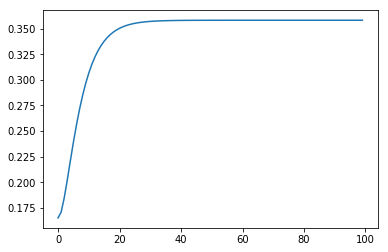

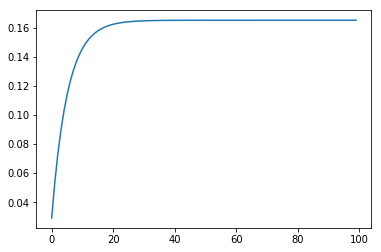

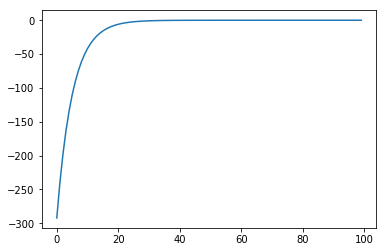

In [240]:
print (a)
plt.plot(all_loss)
plt.show()

plt.plot(all_a)
# plt.yscale("log")
plt.show()

plt.plot(all_Jda)